# Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(**X_train, y_train, test_size=0.25**, random_state=1) # 0.25 x 0.8 = 0.2

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris #datasets

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### House data, predict price, based on features
Artifically creating datasets, for simplicity

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [3]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
'''
df.rename(columns={'Avg. Area Income': 'income', 
                   'Avg. Area House Age': 'age',
                   'Avg. Area Number of Rooms': 'rooms',
                   'Avg. Area Number of Bedrooms': 'bedrooms',
                   'Area Population': 'population',
                   'Price': 'price',
                   'Adress': 'adress'
                   }, inplace=True)
'''

#you can use inplace or df = 
df = df.rename(columns=lambda x: x.split()[-1])

df = df.apply(lambda x: round(x, 2))

df.head(2)

,Income,Age,Rooms,Bedrooms,Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


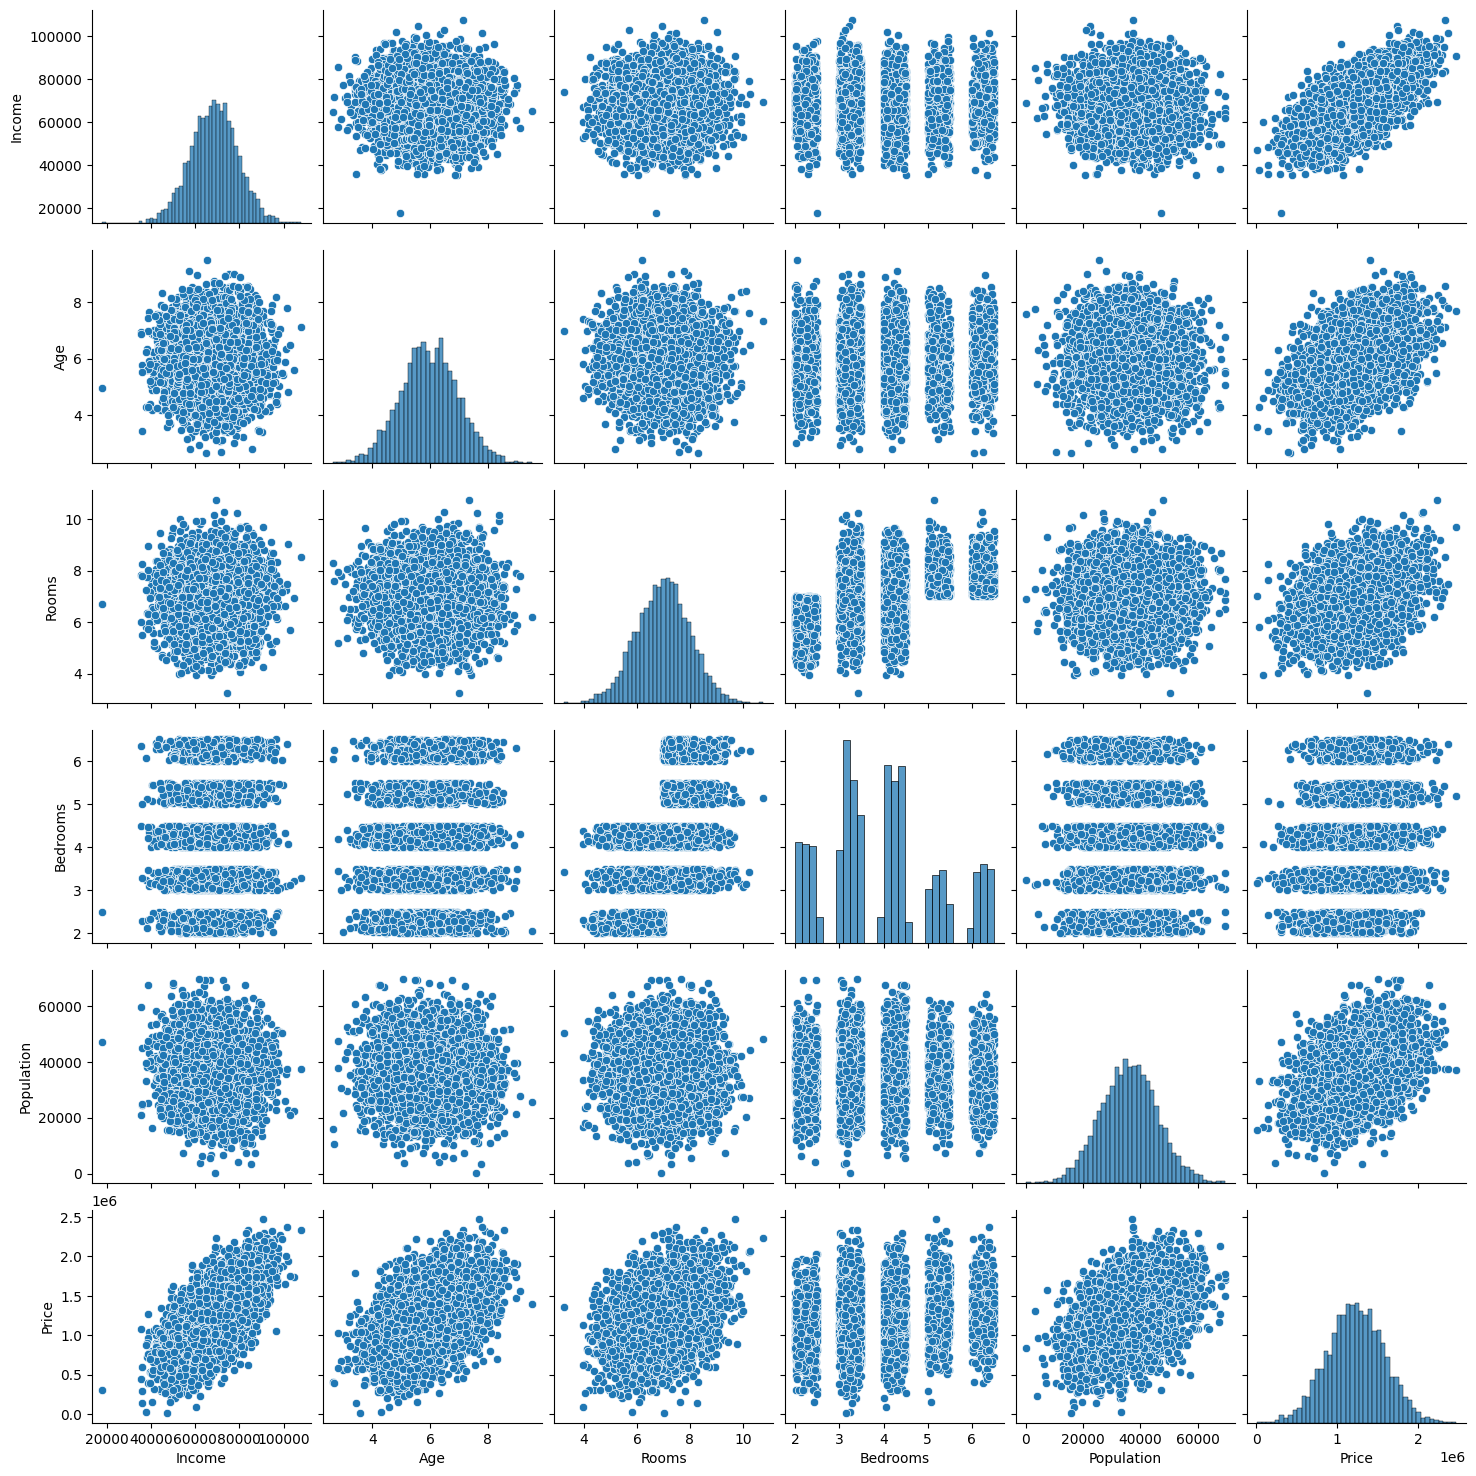

In [5]:
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Count'>

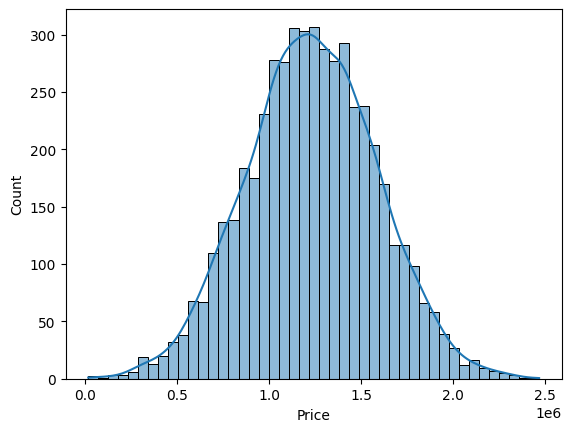

In [6]:
sns.histplot(df['Price'], kde=True)

<Axes: >

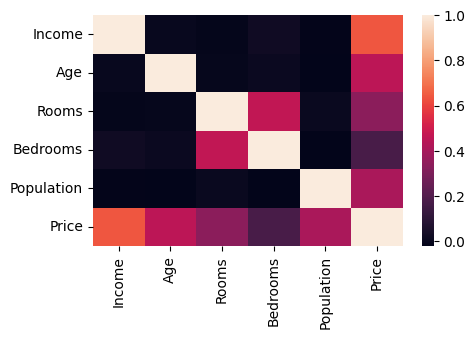

In [7]:
corelation = df.corr(numeric_only=True)
plt.figure(figsize=(5,3))
sns.heatmap(corelation,)

Regression model cant use text without natural language processing so we can ignore it for now.

We now split our data into X and Y
- X: used to guess / mesure (FEATURES)
- y: what we're trying to get (TARGET)

In [8]:
df.columns

Index(['Income', 'Age', 'Rooms', 'Bedrooms', 'Population', 'Price', 'Address'], dtype='object')

In [9]:
X = df[['Income', 'Age', 'Rooms', 'Bedrooms', 'Population']]
y = df['Price']

#for X you may also do df.drop('Price', axis=1)
#so its all of them minus Price

In [10]:
#from sklearn.model_selection import train_test_split

#hover over to read docs
{train_test_split}
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#linar regression obj
lm = LinearRegression()

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
lm.score(X_train, y_train)

0.9148130825057855

In [15]:
print(f'intercepts: {lm.intercept_}')
print(f'coefficients: {lm.coef_}')

intercepts: -2632382.143613579
coefficients: [2.14575226e+01 1.65617295e+05 1.22596447e+05 4.43521685e+01
 1.51504077e+01]


In [16]:
pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coeff'])
#columns = names the column

,Coeff
Income,21.457523
Age,165617.294928
Rooms,122596.447216
Bedrooms,44.352169
Population,15.150408


Meaning (ex. Income Coefficient):
- If we hold all other features fixed, one unit ($1) increace in Avg Area INCOME, it'll lead to a $21.45 increase in house price

Rooms Coefficient
- Increase in 1 room leads to an average increase of $122596

Etc.

## Predictions and Evaluation

In [17]:
predictions = lm.predict(X_test)

#predictions for the house prices in X_test
#y_test is actual price
predictions

array([ 969125.62907776, 1430481.56687888, 1338202.83043393, ...,
       1241618.57487851, 1744558.53950087, 1169410.47783572])

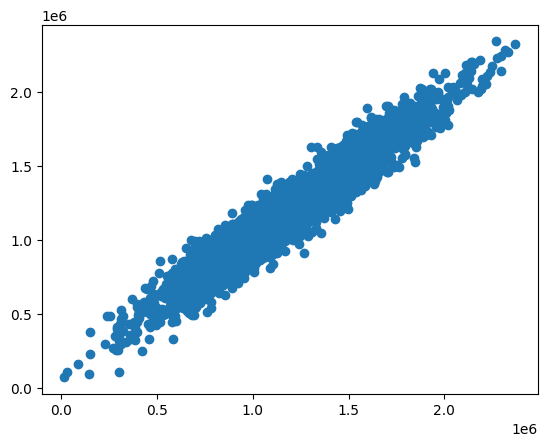

In [18]:
plt.scatter(y_test, predictions)

Residuals: difference between ACTUAL values and PREDICTONS

<Axes: xlabel='Price', ylabel='Count'>

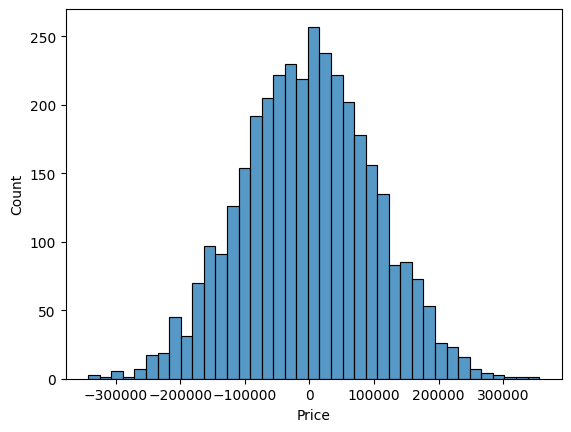

In [19]:
sns.histplot((y_test - predictions))

Graph being a normal distribution is good, means we used appropiate model

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [20]:
from sklearn import metrics

In [21]:
#(true, predicted)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

#np.sqrt(MSE), MSE**(0.5)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81466.27945966362
MSE: 10304578808.756062
RMSE: 101511.4713160836
